# Würfel und Münze

#### Import libraries and Data generation

In [1]:
import numpy as np
import pandas as pd

dice = [1,2,3,4,5,6]
dice_10000 = np.random.choice(dice, 10000, replace=True)

coin = ['Kopf', 'Zahl']
coin_10000 = np.random.choice(coin, 10000, replace=True)

__From " numpy Array"  into --> "pandas DataFrame"__


In [2]:
dfd = pd.DataFrame(dice_10000, columns=['Ergebnis'])
dfd['Versuchnummer'] = dfd.index +1
dfd.set_index('Versuchnummer', inplace=True)


dfc = pd.DataFrame(coin_10000, columns=['Ergebnis'])
dfc['Versuchnummer'] = dfc.index +1
#dfc.set_index('Versuchnummer', inplace=True)


### Granulation in 10, 100, 1000, 10000 data samples for Dice

In [3]:
n = [10,100,1000,10000]

d={}
for i in n:
    d["df" + str(i)] = pd.DataFrame(pd.Series(dfd.sample(i)['Ergebnis']).value_counts())
    d["df" + str(i)].rename(columns={'Ergebnis': 'Absolute Häufigkeit'}, inplace=True)
    d["df" + str(i)]['Relative Häufigkeit'] = d["df" + str(i)].apply (lambda row: row['Absolute Häufigkeit'] / i, axis=1)
    d["df" + str(i)]['Ergebnis'] = d["df" + str(i)].index
    d["df" + str(i)]['n'] = np.repeat(i, len(d["df" + str(i)].index))
    

df10 = pd.DataFrame(d['df10']).sort_index()
df100 = pd.DataFrame(d['df100']).sort_index()
df1000 = pd.DataFrame(d['df1000']).sort_index()
df10000 = pd.DataFrame(d['df10000']).sort_index()


In [4]:
df = pd.concat([df10,df100, df1000,df10000], axis=0)
df

,Absolute Häufigkeit,Relative Häufigkeit,Ergebnis,n
1,2,0.2000,1,10
2,2,0.2000,2,10
3,1,0.1000,3,10
4,3,0.3000,4,10
6,2,0.2000,6,10
1,15,0.1500,1,100
2,17,0.1700,2,100
3,17,0.1700,3,100
4,16,0.1600,4,100
5,16,0.1600,5,100


### Bar charts using seaborn

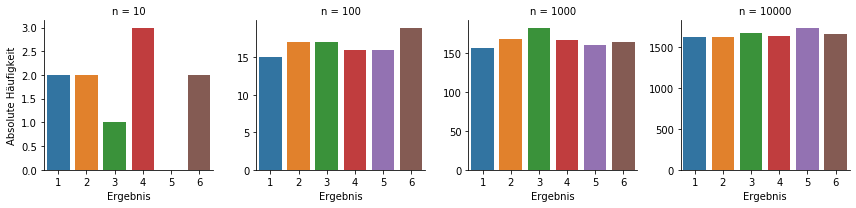

In [5]:
import seaborn as sb

g = sb.FacetGrid(df, col='n', hue='Ergebnis' , sharey=False)
g.map(sb.barplot,'Ergebnis','Absolute Häufigkeit' , order=[1,2,3,4,5,6])

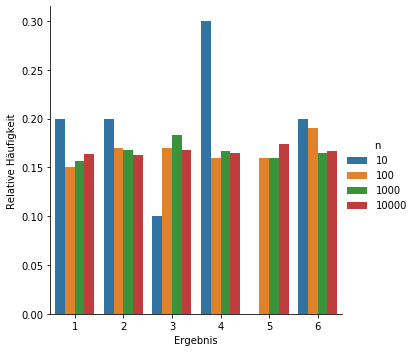

In [6]:
g = sb.catplot(x='Ergebnis', y='Relative Häufigkeit', hue='n', data=df, kind='bar')

### Granulation for coin data

In [7]:
dfc['Kopf'] = dfc.groupby('Ergebnis').cumcount() + 1

for i in range(0,10000):
    if (dfc['Ergebnis'].iloc[i] == 'Zahl'):
           dfc.at[i, 'Kopf'] = 0
            
for i in range(0,10000):
    if (dfc['Kopf'].iloc[i] == 0) & (i>0):
           dfc.at[i, 'Kopf'] = dfc.at[i-1, 'Kopf']

dfc['Relative Häufgkeit Kopf'] = dfc['Kopf'] / dfc['Versuchnummer'] 
dfc


,Ergebnis,Versuchnummer,Kopf,Relative Häufgkeit Kopf
0,Kopf,1,1,1.000000
1,Kopf,2,2,1.000000
2,Kopf,3,3,1.000000
3,Kopf,4,4,1.000000
4,Zahl,5,4,0.800000
...,...,...,...,...
9995,Zahl,9996,5068,0.507003
9996,Kopf,9997,5069,0.507052
9997,Zahl,9998,5069,0.507001
9998,Zahl,9999,5069,0.506951


In [8]:
df = dfc[['Ergebnis','Versuchnummer' ,'Relative Häufgkeit Kopf']]
df

,Ergebnis,Versuchnummer,Relative Häufgkeit Kopf
0,Kopf,1,1.000000
1,Kopf,2,1.000000
2,Kopf,3,1.000000
3,Kopf,4,1.000000
4,Zahl,5,0.800000
...,...,...,...
9995,Zahl,9996,0.507003
9996,Kopf,9997,0.507052
9997,Zahl,9998,0.507001
9998,Zahl,9999,0.506951


### Coin Charts based on Granulation

In [9]:
df['k'] = pd.DataFrame(np.repeat(1, 10000))
for i in range(5,10000,5):
    if (i % 100) == 0:
        df.at[i, 'k'] = 100
    elif (i % 10) == 0:
        df.at[i, 'k'] = 10
    else:
        df.at[i, 'k'] = 5
       

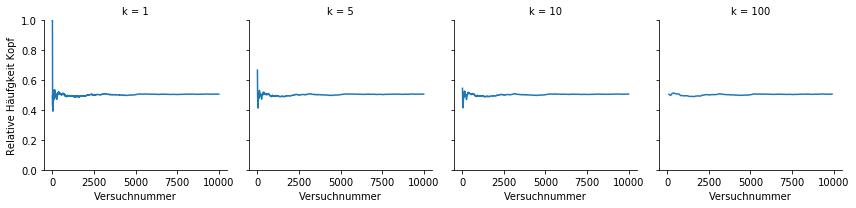

In [10]:
import matplotlib.pyplot as plt

g = sb.FacetGrid(df, col='k')
g = (g.map(plt.plot, "Versuchnummer", "Relative Häufgkeit Kopf")
           .set(ylim=(0, 1),
           xticks=[0, 2500, 5000,7500, 10000]))